<a href="https://colab.research.google.com/github/zzickso/DeepLearning/blob/main/ARIMA_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -197.350
Method:                       css-mle   S.D. of innovations             66.436
Date:                Wed, 09 Jun 2021   AIC                            408.699
Time:                        01:12:20   BIC                            419.587
Sample:                    02-01-1991   HQIC                           412.458
                         - 12-01-1993                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.4256      3.774      3.292      0.003       5.028      19.823
ar.L1.D.Sales    -1.0850      0.188     -5.764      0.000      -1.454      -0.716
ar.L2.D.Sales    -0.6688      0.283     

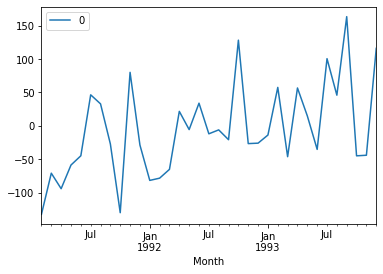

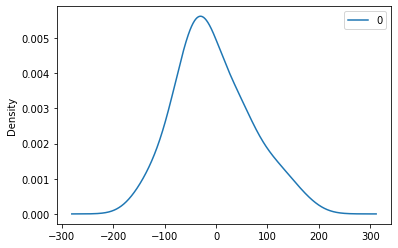

                0
count   35.000000
mean    -5.569325
std     70.272662
min   -132.525630
25%    -45.563866
50%    -20.763571
75%     39.933127
max    163.552083


In [4]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

def parser(x): # 시간을 표현하는 함수 정의
    return datetime.strptime('199'+x, '%Y-%m') # strptime() 날짜와 시간 정보를 문자열로 바꾸어 주는 메서드

series = read_csv('/content/drive/MyDrive/test/sales.csv', header=0,parse_dates=[0],index_col=0,
                  squeeze=True,date_parser=parser) # 자전거 매출에 대한 csv 데이터 호출
model=ARIMA(series, order=(5,1,0))
model_fit=model.fit(disp=0) # 모형을 적용할 때 많은 디버그 정보가 제공되는데 disp 인수를 0으로 설정하여 이 기능을 비활성화
print(model_fit.summary()) # 모델에 대한 정보 표시

residuals=DataFrame(model_fit.resid) # DataFrame에 모델에 대한 오차 정보를 residuals에 저장
residuals.plot() # residuals 정보를 시각적으로 표현
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


predicted=354.377671,expected=346.300000
predicted=288.627344,expected=329.700000
predicted=382.818006,expected=445.400000
predicted=339.543868,expected=325.900000
predicted=392.897227,expected=449.300000
predicted=354.487850,expected=411.300000
predicted=452.200124,expected=417.400000
predicted=406.806186,expected=545.500000
predicted=430.162063,expected=477.600000
predicted=492.745322,expected=687.000000
predicted=493.604475,expected=435.300000
predicted=657.397091,expected=587.300000
predicted=522.091126,expected=676.900000
Test MSE: 8074.987


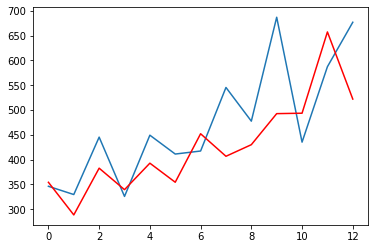

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error

X=series.values
X=np.nan_to_num(X)
size=int(len(X)*0.66)
train, test =X[0:size],X[size:len(X)] # train과 test로 데이터셋 분리
history=[x for x in train]
predictions=list()
for t in range(len(test)): #test 데이터셋의 길이(13번)만큼 반복하여 수행
    model =ARIMA(history, order=(5,1,0)) # ARIMA() 함수 호출
    model_fit=model.fit(disp=0)
    output= model_fit.forecast() # forecast() 매서드를 사용하여 예측 수행
    yhat=output[0] # 모델 출력 결과를 yhat에 저장
    predictions.append(yhat)
    obs=test[t]
    history.append(obs)
    print('predicted=%f,expected=%f'%(yhat,obs)) #모델 실행 결과를 predicted 로 출력, test로 분리해둔 데이터를 expected로 사용하여 출력
error= mean_squared_error(test, predictions) # 손실함수로 평균 제곱 오차 사용
print('Test MSE: %.3f' %error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()